In [46]:
# read fed_funds.csv
import pandas as pd
import numpy as np

# read fed_funds.csv
data = pd.read_csv('data/fed_funds.csv')
data.head()

,Date,Rate,Change
0,1/3/05,2.25,NaN
1,1/4/05,2.25,0.0
2,1/5/05,2.25,0.0
3,1/6/05,2.25,0.0
4,1/7/05,2.25,0.0


In [47]:
# Convert the 'Date' column to datetime64
data['Date'] = pd.to_datetime(data['Date'])

# limit data to 2020
df = data[data['Date'] >= '2020-01-01']
df.head()

,Date,Rate,Change
3912,2020-01-01,1.625,0.0
3913,2020-01-02,1.625,0.0
3914,2020-01-03,1.625,0.0
3915,2020-01-06,1.625,0.0
3916,2020-01-07,1.625,0.0


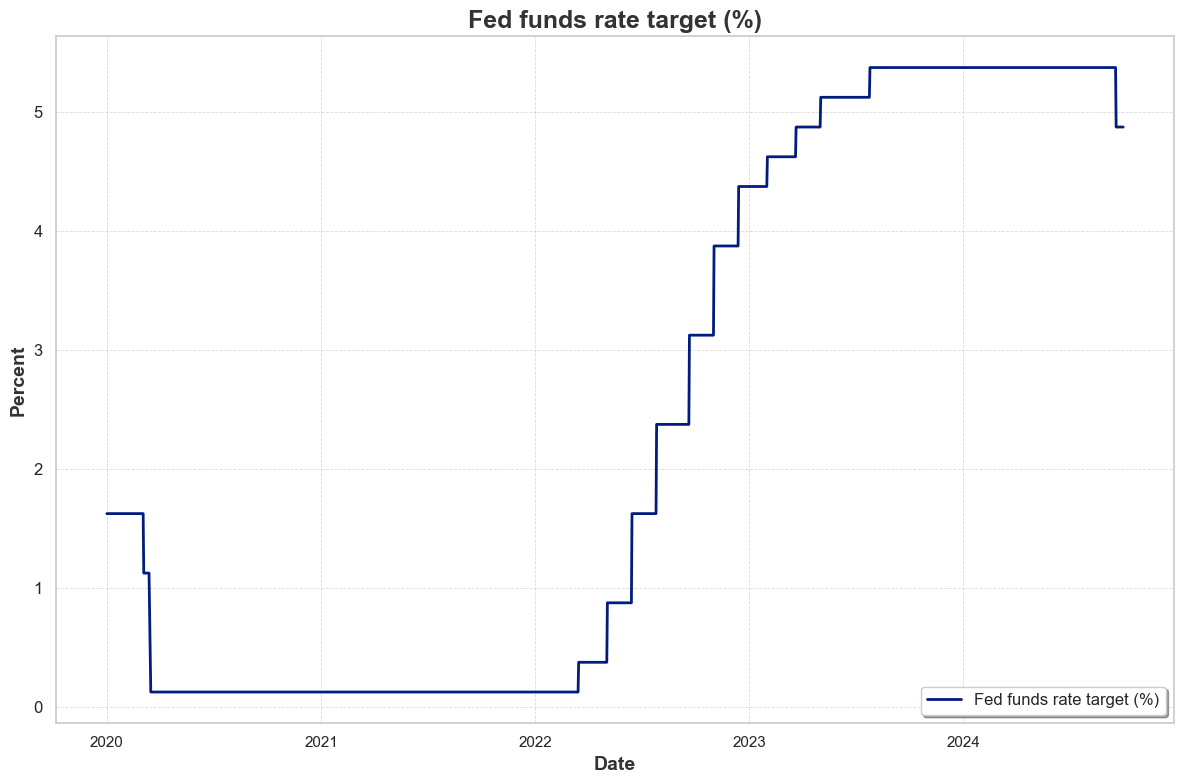

In [48]:
import matplotlib.pyplot as plt, seaborn as sns

# Set up the style using seaborn
sns.set(style="whitegrid", palette="dark")

# Create a figure and axis with a larger size for better aesthetics
plt.figure(figsize=(12, 8))

# Plot each series
sns.lineplot(x='Date', y='Rate', data=df, 
                    label="Fed funds rate target (%)", linewidth=2)

# Enhance the title and labels
plt.title("Fed funds rate target (%)", fontsize=18, weight='bold', color='#333333')
plt.xlabel("Date", fontsize=14, weight='bold', color='#333333')
plt.ylabel("Percent", fontsize=14, weight='bold', color='#333333')

# Rotate the x-axis labels for better readability and adjust their size
plt.xticks(rotation=0, fontsize=12, minor=True)
plt.yticks(fontsize=12)

# Add month line ticks

# Add a grid with more customization
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

# Show the legend with a custom location and background
plt.legend(loc='lower right', frameon=True, fontsize=12, fancybox=True, shadow=True)

# Tighten layout to make the plot look cleaner
plt.tight_layout()

plt.show()

In [49]:
# make a new data frame with the rate changes
# for each month get the min and max entry in the Change column otherwise 0

change_dict = {}
for year in range(2020, 2025):
    for month in range(1, 13):
        min_rate = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]['Change'].min()
        max_rate = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]['Change'].max()
        

        if max_rate == 0:
            # print(f'{year}-{month:02d} {min_rate:.2f}')
            change_dict[f'{year}-{month:02d}'] = min_rate
        elif min_rate == 0:
            # print(f'{year}-{month:02d} {max_rate:.2f}')
            change_dict[f'{year}-{month:02d}'] = max_rate
        else:
            # print(f'{year}-{month:02d} 0')
            change_dict[f'{year}-{month:02d}'] = 0

change_df = pd.DataFrame(change_dict.items(), columns=['Date', 'Change'])
change_df.head()

,Date,Change
0,2020-01,0.0
1,2020-02,0.0
2,2020-03,-1.0
3,2020-04,0.0
4,2020-05,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


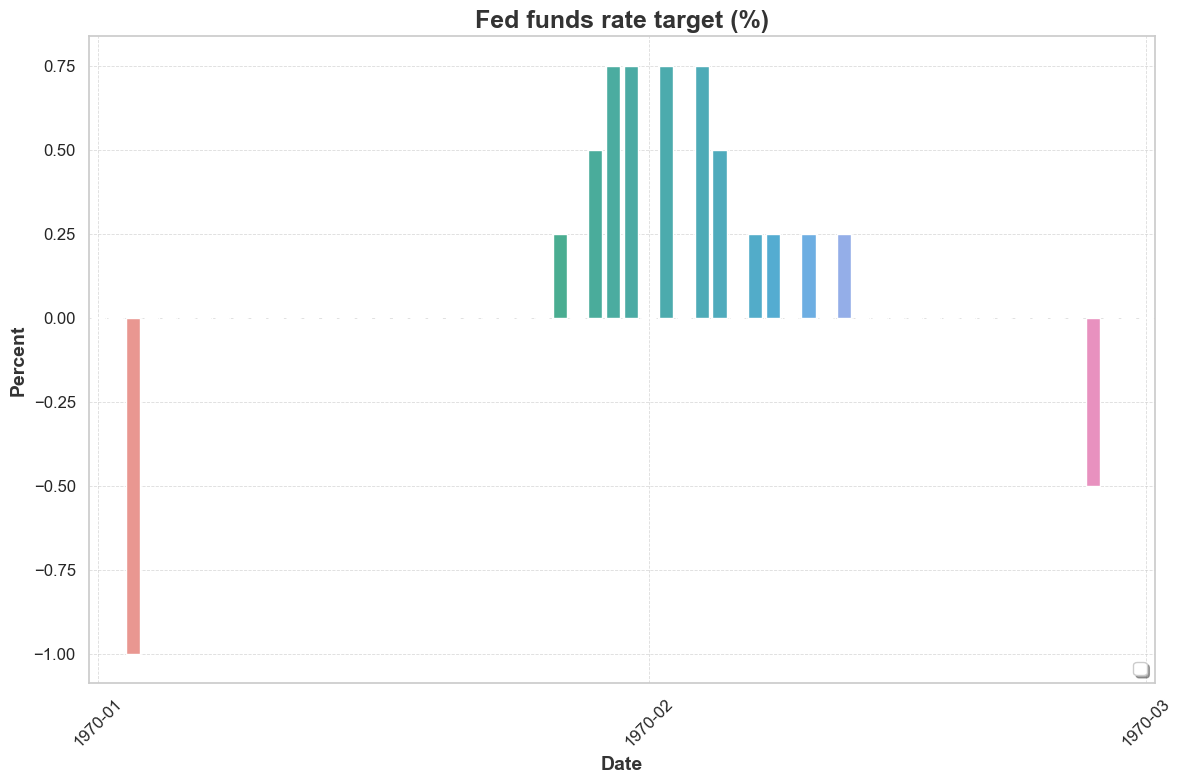

In [50]:
import matplotlib.dates as mdates


# graph bar plot of rate changes
# Set up the style using seaborn

# Set up the style using seaborn
sns.set(style="whitegrid", palette="dark")

# Create a figure and axis with a larger size for better aesthetics
plt.figure(figsize=(12, 8))

# Plot each series
sns.barplot(x='Date', y='Change', data=change_df)

# Enhance the title and labels
plt.title("Fed funds rate target (%)", fontsize=18, weight='bold', color='#333333')
plt.xlabel("Date", fontsize=14, weight='bold', color='#333333')
plt.ylabel("Percent", fontsize=14, weight='bold', color='#333333')

# Rotate the x-axis labels for better readability and adjust their size
plt.xticks(rotation=45, fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show label every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.yticks(fontsize=12)

# Add a grid with more customization
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

# Show the legend with a custom location and background
plt.legend(loc='lower right', frameon=True, fontsize=12, fancybox=True, shadow=True)

# Tighten layout to make the plot look cleaner
plt.tight_layout()

plt.show()

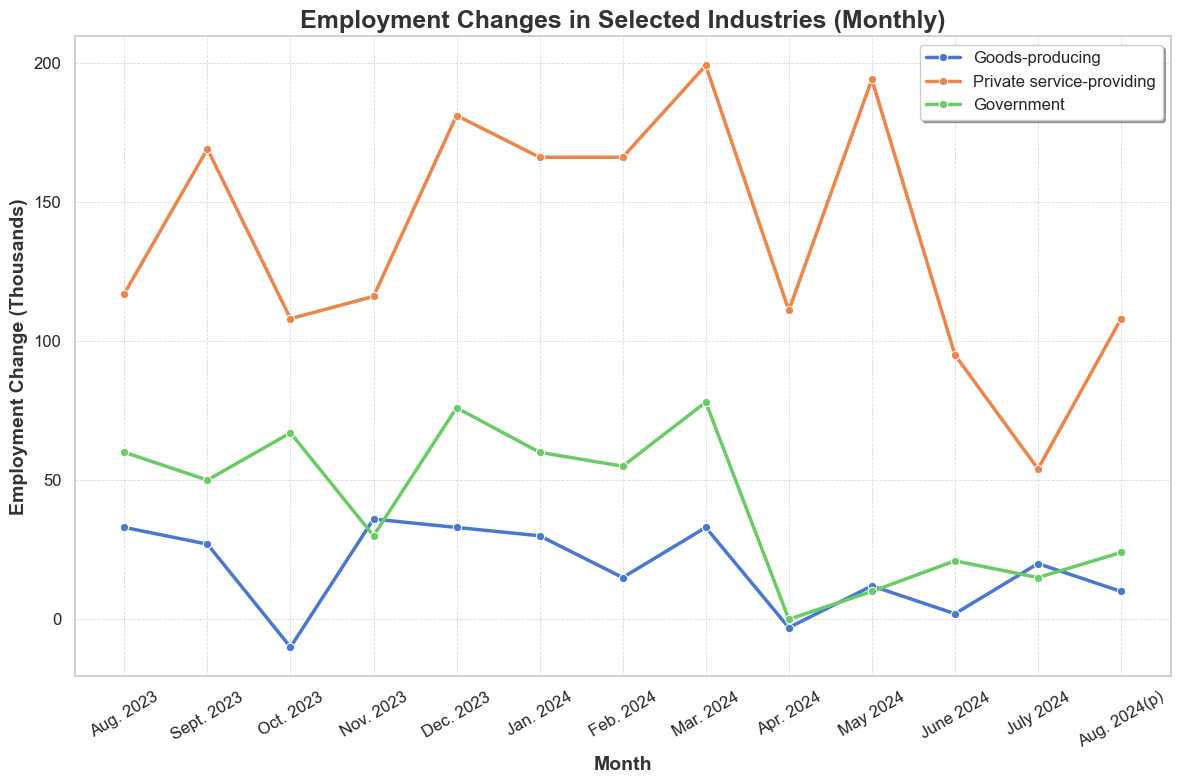

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data input (as a dictionary for simplicity)
data = {
    'Month': ['Aug. 2023', 'Sept. 2023', 'Oct. 2023', 'Nov. 2023', 'Dec. 2023', 'Jan. 2024', 
              'Feb. 2024', 'Mar. 2024', 'Apr. 2024', 'May 2024', 'June 2024', 'July 2024', 'Aug. 2024(p)'],
    'Goods-producing': [33, 27, -10, 36, 33, 30, 15, 33, -3, 12, 2, 20, 10],
    'Private service-providing': [117, 169, 108, 116, 181, 166, 166, 199, 111, 194, 95, 54, 108],
    'Government': [60, 50, 67, 30, 76, 60, 55, 78, 0, 10, 21, 15, 24]
    # Add more industries as needed
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Set up the style using seaborn
sns.set(style="whitegrid", palette="muted")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting multiple lines for each category
for column in df.columns[1:]:
    sns.lineplot(x='Month', y=column, data=df, marker='o', linewidth=2.5, label=column)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Enhance the title and labels
plt.title("Employment Changes in Selected Industries (Monthly)", fontsize=18, weight='bold', color='#333333')
plt.xlabel("Month", fontsize=14, weight='bold', color='#333333')
plt.ylabel("Employment Change (Thousands)", fontsize=14, weight='bold', color='#333333')

# Rotate the x-axis labels for better readability and adjust their size
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid with more customization
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

# Show the legend with a custom location and background
plt.legend(loc='upper right', frameon=True, fontsize=12, fancybox=True, shadow=True)

# Tighten the layout and show plot
plt.tight_layout()
plt.show()


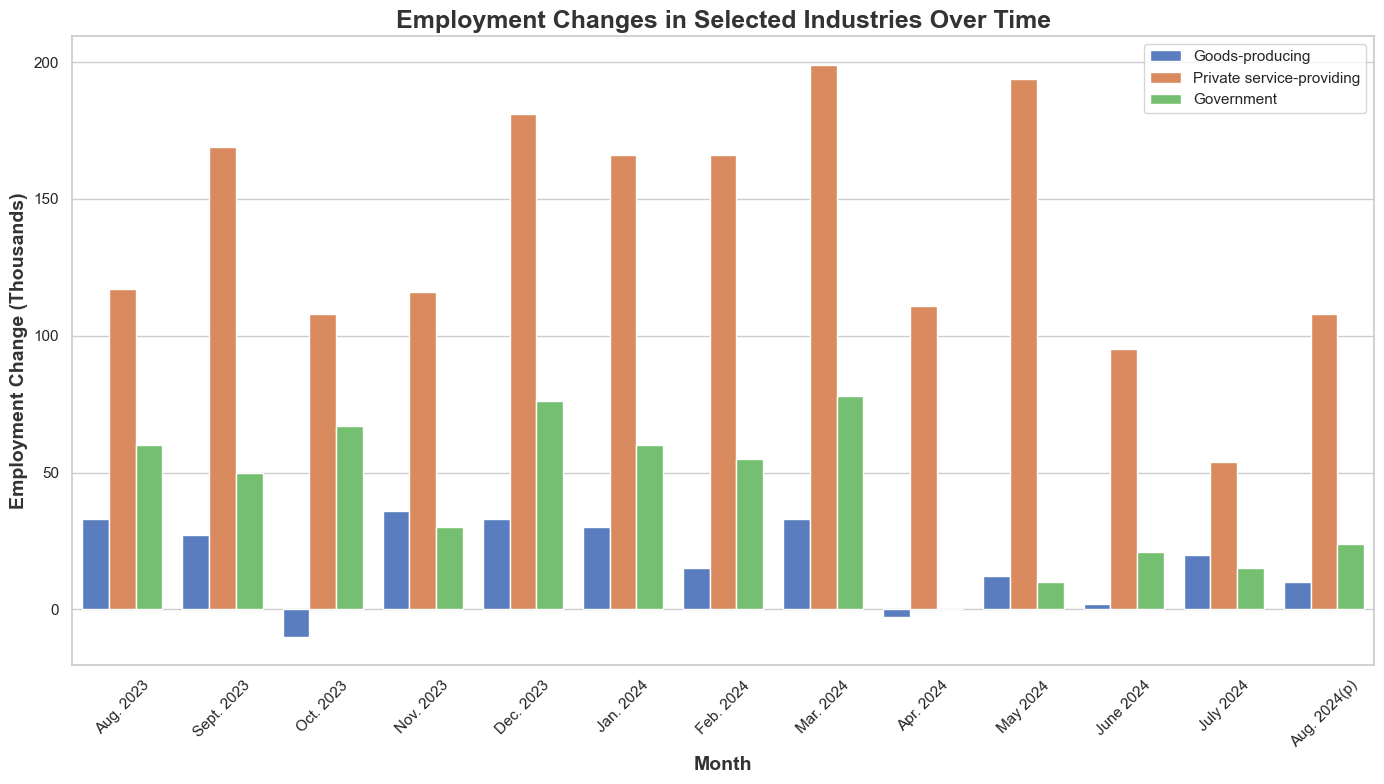

In [61]:
df_melted = df.melt(id_vars=['Month'], var_name='Industry', value_name='Employment Change')

plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='Employment Change', hue='Industry', data=df_melted)

# Enhance the title and labels
plt.title("Employment Changes in Selected Industries Over Time", fontsize=18, weight='bold', color='#333333')
plt.xlabel("Month", fontsize=14, weight='bold', color='#333333')
plt.ylabel("Employment Change (Thousands)", fontsize=14, weight='bold', color='#333333')

plt.xticks(rotation=45)
plt.legend(loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
